In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           3571         67  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          23218        505  1.0              
dhavalpatel555/us-stock-market-2020-to-2024             US Stock Market 2020 to 2024                  123KB  2024-02-19 08:06:38           1052         28  0.9411765        
tarunrm09/climate-change-indicators                     Climate change Indicators                      34KB  2024-02-22 08:53:54  

In [ ]:
!pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow scikit-learn


In [ ]:
!kaggle datasets download 'furatbasel/flower-image-dataset'

 97% 353M/363M [00:03<00:00, 115MB/s]
100% 363M/363M [00:03<00:00, 112MB/s]


In [ ]:
!unzip '/content/flower-image-dataset.zip'

Archive:  /content/flower-image-dataset.zip
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00002.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00003.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00004.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00005.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00006.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00007.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00008.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00009.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00010.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00012.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00013.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00014.jpg  
  inflating: flower-image-dataset/bougainvillea/bougainvillea_00015.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import os

In [ ]:
import cv2
from tqdm import tqdm_notebook as tqdm
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


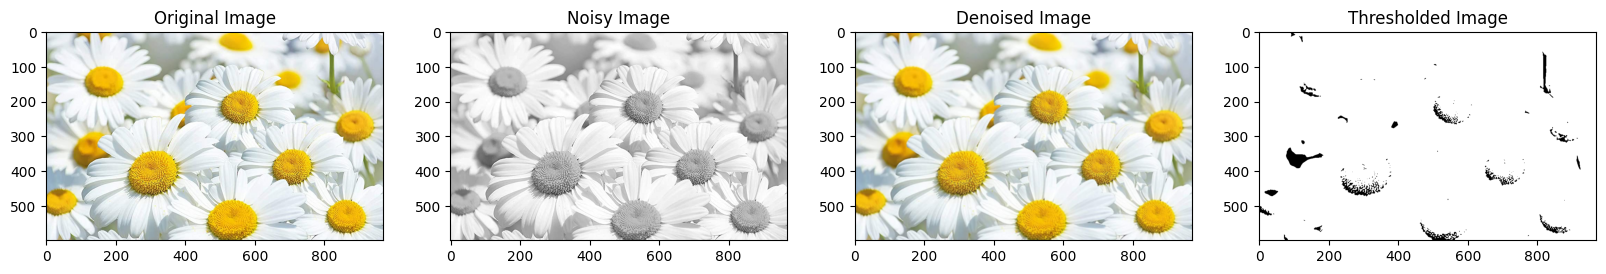

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt


dataset_path = '/content/flower-image-dataset/daisies'

image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

selected_image = random.choice(image_files)
image_path = os.path.join(dataset_path, selected_image)


original_image = cv2.imread(image_path)


gray_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)


denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

gray_denoised = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)


_, thresholded_image = cv2.threshold(gray_denoised, 127, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(gray_original, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')

plt.subplot(1, 4, 4)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.show()


In [ ]:
%ls /content



flower-image-dataset/  flower-image-dataset.zip  kaggle.json  sample_data/


In [ ]:
import os

validation_data_dir = '/content/validation'
os.makedirs(validation_data_dir, exist_ok=True)


In [ ]:
import os
print(os.getcwd())


/content


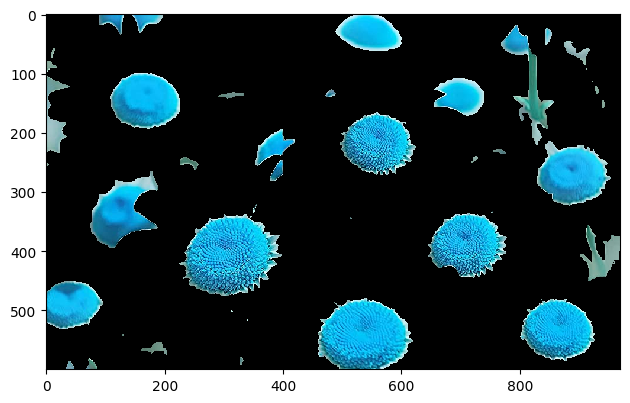

In [ ]:
import cv2
import numpy as np
from skimage import io
from sklearn.cluster import KMeans


lab_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2LAB)


ab_channels = lab_image[:, :, 1:]


flat_ab_channels = ab_channels.reshape((-1, 2))

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(flat_ab_channels)
clustered_ab_channels = kmeans.labels_.reshape(ab_channels.shape[:2])


_, flower_mask = cv2.threshold(clustered_ab_channels.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


segmented_flowers = cv2.bitwise_and(original_image, original_image, mask=flower_mask)

io.imshow(segmented_flowers)
io.show()


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_




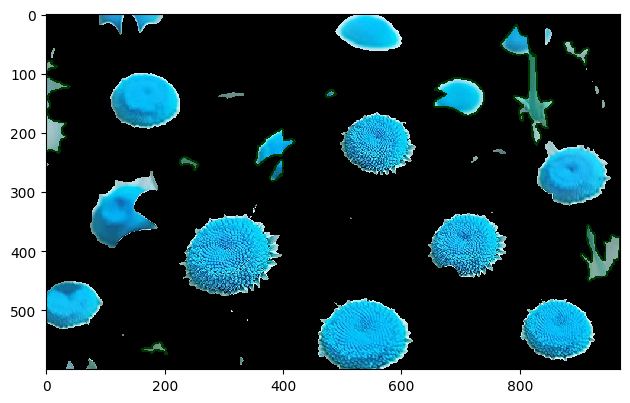

Total Petal Count: 11


In [ ]:
import cv2
import numpy as np
from skimage import io


gray_segmented_flowers = cv2.cvtColor(segmented_flowers, cv2.COLOR_BGR2GRAY)


_, thresholded_flowers = cv2.threshold(gray_segmented_flowers, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


contours, _ = cv2.findContours(thresholded_flowers, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


petal_count = 0


counting_result = segmented_flowers.copy()


for contour in contours:

    area = cv2.contourArea(contour)


    if 100 < area < 5000:

        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)


        if len(approx) > 6:

            cv2.drawContours(counting_result, [contour], 0, (0, 55, 0), 2)

            petal_count += 1

io.imshow(counting_result)
io.show()


print(f'Total Petal Count: {petal_count}')


In [ ]:
def calculate_and_print_metrics(ground_truth_counts, detected_counts):
    def calculate_metrics(ground_truth_counts, detected_counts):
        true_positives = 0
        false_positives = 0
        false_negatives = 0

        for gt_count, detected_count in zip(ground_truth_counts, detected_counts):
            true_positives += min(gt_count, detected_count)
            false_positives += max(0, detected_count - gt_count)
            false_negatives += max(0, gt_count - detected_count)

        accuracy = true_positives / sum(ground_truth_counts)
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1_score

    accuracy, precision, recall, f1_score = calculate_metrics(ground_truth_counts, detected_counts)

    print(f'Accuracy: {accuracy:.2%}')
    print(f'Precision: {precision:.2%}')
    print(f'Recall: {recall:.2%}')
    print(f'F1 Score: {f1_score:.2%}\n')



calculate_and_print_metrics([20, 9, 6], [19, 9, 5])


Accuracy: 94.29%
Precision: 100.00%
Recall: 94.29%
F1 Score: 97.06%

